In [1]:
import matplotlib.pyplot as plt
from utils.draw_functions import *
from utils.covariance_matrix import *
from utils.image_processing import *
from utils.fruit_angle import *
from utils.z_coords import *
from utils.rotation_matrix import *
import angles_data.tomatoes
import angles_data.mandarins
import cv2
import os

In [2]:
sphere_path = "../data/oranges/obj0001"
oblate_path = "../data/tomatoes/obj0001"
prolate_path = "../data/prolate-tomato/"
path = oblate_path

In [3]:
image_files = sorted([file for file in os.listdir(path)])
axe_b_all_views = []
axe_a_all_views = []
projected_ellipses = []
oblate_spheroid = []
color_imgs = []
processed_imgs = []
angles = [-1 for element in range(len(image_files))]

In [4]:
ellipses_imgs = []
angle_imgs = []
estimated_angles = []

Point 3.1.1

In [5]:
for image_name in image_files:
    file_path = os.path.join(path, image_name)
    color_img = cv2.imread(file_path)
    img = preprocess_img(color_img)
    _, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
    ellipse = calculate_ellipse_from_mask(mask)
    axes_length, _, _, _ = ellipse
    major_axis_length, minor_axis_length = axes_length
    axe_b_all_views.append(minor_axis_length)
    axe_a_all_views.append(major_axis_length)
    processed_imgs.append(img)
    color_imgs.append(color_img)
    projected_ellipses.append(ellipse)

Point 3.1.2

In [6]:
# sphere_spheroid = calculate_spheroid(axe_a_all_views, axe_b_all_views, 1)
oblate_spheroid = calculate_spheroid(axe_a_all_views, axe_b_all_views)
# prolate_spheroid = calculate_spheroid(axe_a_all_views, axe_b_all_views, 3)
spheroid = oblate_spheroid
print(spheroid)

[160.94117647058823, 125]


Example of spheroid axes on view

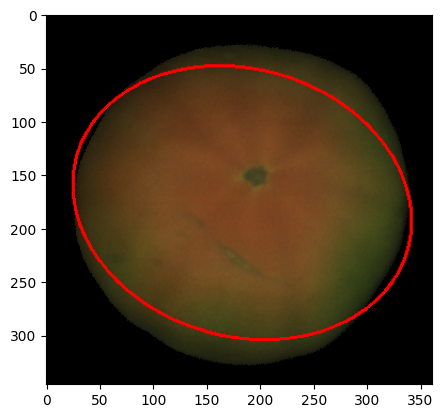

In [9]:
idx_to_show = 0
axes_img = color_imgs[idx_to_show].copy()
axes_img = cv2.cvtColor(axes_img, cv2.COLOR_BGR2RGB)
spheroid_ellipse = [spheroid, *projected_ellipses[idx_to_show][1:]]
draw_ellipse(axes_img, spheroid_ellipse, False)
plt.imshow(axes_img)

Point 3.1.3

In [8]:
# for index, image_name in enumerate(image_files):
#     file_path = os.path.join(path, image_name)
#     img = cv2.imread(file_path)
#     estimated_angle_img = img.copy()
#     oblate_angle = angle_estimation(index, angles, axe_b_all_views, spheroid)
#     write_angle_on_img(estimated_angle_img, oblate_angle, (50, 50), (0, 255, 0))
#     estimated_angles.append(estimated_angle_img)

ValueError: math domain error

In [ ]:
# TODO: TEST WITH CORRECT ANGLE VALUES
# angles = [60, 30, 0, -10, -40, -90, -60, -30, 0, 10, 30, 50, 70]
angles = angles_data.tomatoes.obj0006
for index, angle in enumerate(angles):
    angle_img = color_imgs[index].copy()
    write_angle_on_img(angle_img, angle, (50, 50), (0, 255, 0))
    angle_imgs.append(angle_img)

In [ ]:
joined_angle_images = join_images(angle_imgs)
# joined_angle_images = cv2.cvtColor(joined_angle_images, cv2.COLOR_BGR2RGB)
plt.imshow(joined_angle_images)
cv2.imwrite("./generated_imgs/angles.png", joined_angle_images)

In [11]:
joined_angle_images = join_images(estimated_angles)
cv2.imwrite("./generated_imgs/estimated-angles.png", joined_angle_images)

True

In [11]:
joined_color_imgs = join_images(color_imgs)
cv2.imwrite("./generated_imgs/color-imgs.png", joined_color_imgs)

True

#### Rotation estimation
For a source and target

In [11]:
# source_img_idx = 0
# target_img_idx = 1

In [12]:
# l_points = define_l_points(processed_imgs[source_img_idx], projected_ellipses[source_img_idx])
# plt.imshow(cv2.cvtColor(l_points, cv2.COLOR_BGR2RGB))
# l_points_indices = np.argwhere(l_points == 255)

In [13]:
# print(len(l_points))
# print(l_points_indices)

Point 3.1.4

In [14]:
# z_coordinates = np.zeros_like(processed_imgs[source_img_idx])  # like source img
# calculate_z_coordinates(l_points_indices, angles[source_img_idx], projected_ellipses[source_img_idx], spheroid, z_coordinates)

Search of plausible rotations

In [15]:
# max_exp_rotation = 30
# estimated_rotation_matrix, estimated_rotation_error = find_best_rotation(max_exp_rotation, processed_imgs[source_img_idx], processed_imgs[target_img_idx], l_points_indices, z_coordinates, projected_ellipses[source_img_idx])

In [16]:
# rotation_angles = rotationMatrixToEulerAngles(estimated_rotation_matrix)
# print("ROTATION IN EACH AXIS  \t", rotation_angles)

#### Tracking points with estimate rotation

In [17]:
# _, center, _, _ = projected_ellipses[source_img_idx]
# target_img = color_imgs[target_img_idx].copy()
# source_img = color_imgs[source_img_idx].copy()

In [18]:
# ps = np.array([*center, z_coordinates[center[1], center[0]]])
# print(ps)
# draw_circle(source_img, ps)
# plt.imshow(cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB))

In [19]:
# pt = estimated_rotation_matrix @ ps
# print(pt)
# draw_circle(target_img, pt)
# plt.imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))

## Point tracking in all the views

In [20]:
point_tracking_imgs = []

In [21]:
ps = []
for index, processed_img in enumerate(processed_imgs):
    if index < len(processed_imgs) - 1:
        # Obtain selected points and calculate z coordiantes
        l_points = define_l_points(processed_imgs[index], projected_ellipses[index])
        l_points_indices = np.argwhere(l_points == 255)

        z_coordinates = np.zeros_like(processed_imgs[index])  # like source img
        calculate_z_coordinates_image(processed_img, angles[index], projected_ellipses[index], spheroid, z_coordinates)

        # Estimate initial rotation
        max_exp_rotation = -30
        views_ellipses = [projected_ellipses[index], projected_ellipses[index + 1]]

        estimated_rotation_matrix, estimated_rotation_error = find_best_rotation(max_exp_rotation, processed_imgs[index], processed_imgs[index + 1], l_points_indices, z_coordinates, views_ellipses)

        # Track points from source img to target using estimate rotation
        source_img = color_imgs[index].copy()
        target_img = color_imgs[index + 1].copy()

        if index == 0:
            _, center, _, _ = projected_ellipses[index]
            ps = np.array([*center, z_coordinates[center[1], center[0]]])
            draw_circle(source_img, ps, (255, 255, 0))
            point_tracking_imgs.append(source_img)

        pt = estimated_rotation_matrix @ ps
        print(pt)
        if pt[2] < 0: # not visible in the next view
            draw_circle(target_img, pt, (0, 255, 0))
        else:
            draw_circle(target_img, pt, (255, 255, 0))
        point_tracking_imgs.append(target_img)
        ps = pt


Rotation   -30 
 []
Rotation   -29 
 194.48505869797225
Rotation   -28 
 194.48505869797225
Rotation   -27 
 194.48505869797225
Rotation   -26 
 194.48505869797225
Rotation   -25 
 194.48505869797225
Rotation   -24 
 194.48505869797225
Rotation   -23 
 194.48505869797225
Rotation   -22 
 194.48505869797225
Rotation   -21 
 194.48505869797225
Rotation   -20 
 194.48505869797225
Rotation   -19 
 194.48505869797225
Rotation   -18 
 194.48505869797225
Rotation   -17 
 194.48505869797225
Rotation   -16 
 194.48505869797225
Rotation   -15 
 194.48505869797225
Rotation   -14 
 194.48505869797225
Rotation   -13 
 194.48505869797225
Rotation   -12 
 194.48505869797225
Rotation   -11 
 194.48505869797225
Rotation   -10 
 194.48505869797225
Rotation   -9 
 194.48505869797225
Rotation   -8 
 194.48505869797225
Rotation   -7 
 194.48505869797225
Rotation   -6 
 194.48505869797225
Rotation   -5 
 194.48505869797225
Rotation   -4 
 194.48505869797225
Rotation   -3 
 194.48505869797225
Rotation   -2 


True

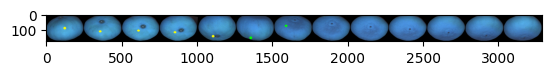

In [22]:
joined_points = join_images(point_tracking_imgs)
plt.imshow(joined_points)
cv2.imwrite("./generated_imgs/tracking points.png", joined_points)